In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from tqdm import tqdm

## Part 1: process the CLICS data and derive a word-to-concept ratio for each language

In [2]:
df = pd.read_csv('raw_corpus_data/clics/df_all_raw.csv')

/Users/dharakyu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.iloc[0]

dataset_ID                                  abrahammonpa
Form_ID                           BugunBichom-100_gold-1
Form                                                 san
clics_form                                           san
gloss_in_source                                     gold
Concepticon_ID                                      1369
Concepticon_Gloss                                   GOLD
Ontological_Category                        Person/Thing
Semantic_Field              Basic actions and technology
variety                                     Bugun Bichom
Glottocode                                      bich1234
ISO639P3code                                         NaN
Macroarea                                            NaN
Family                                      Sino-Tibetan
Latitude                                             NaN
Longitude                                            NaN
MRC_WORD                                            GOLD
AGE_OF_ACQUISITION             

In [4]:
df[(df['Concepticon_Gloss'] == 'WOOD') & (df['ISO639P3code'] == 'spa')]

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,...,Macroarea,Family,Latitude,Longitude,MRC_WORD,AGE_OF_ACQUISITION,CONCRETENESS,FAMILIARITY,IMAGABILITY,KUCERA_FRANCIS_FREQUENCY
147957,diacl,54800-52_wood-1,guja,guja,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147958,diacl,54800-52_wood-2,leño,leno,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147959,diacl,54800-52_wood-3,leña,lena,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147960,diacl,54800-52_wood-4,bosque,bosque,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
147961,diacl,54800-52_wood-5,madera,madera,NaN,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
220739,ids,176-1-430-1,madera,madera,wood,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0
867045,northeuralex,spa-299_wood-1,maðeɾa,madera,wood,1803,WOOD,Person/Thing,The physical world,Spanish,...,Eurasia,Indo-European,40.4414,-1.11788,WOOD,269.0,606.0,574.0,577.0,55.0


In [5]:
df_unique_languages = df.drop_duplicates(subset=['ISO639P3code'])
df_unique_languages = df_unique_languages.dropna(subset=['ISO639P3code'])
df_unique_languages

,dataset_ID,Form_ID,Form,clics_form,gloss_in_source,Concepticon_ID,Concepticon_Gloss,Ontological_Category,Semantic_Field,variety,...,Macroarea,Family,Latitude,Longitude,MRC_WORD,AGE_OF_ACQUISITION,CONCRETENESS,FAMILIARITY,IMAGABILITY,KUCERA_FRANCIS_FREQUENCY
5,abrahammonpa,ChugParchu-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Chug Parchu,...,Eurasia,Sino-Tibetan,27.418381,92.234687,GOLD,NaN,576.0,550.0,594.0,52.0
8,abrahammonpa,HrusoAkaJamiri-100_gold-1,ʃə,s@,gold,1369,GOLD,Person/Thing,Basic actions and technology,Hruso Aka Jamiri,...,Eurasia,Hruso,27.270000,92.630000,GOLD,NaN,576.0,550.0,594.0,52.0
9,abrahammonpa,LishLish-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Lish Lish,...,Eurasia,Sino-Tibetan,27.371821,92.232987,GOLD,NaN,576.0,550.0,594.0,52.0
11,abrahammonpa,MonpaBalemu-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Monpa Balemu,...,Eurasia,Sino-Tibetan,27.073067,92.142965,GOLD,NaN,576.0,550.0,594.0,52.0
12,abrahammonpa,MonpaChangprong-100_gold-1,ser,ser,gold,1369,GOLD,Person/Thing,Basic actions and technology,Monpa Changprong,...,Eurasia,Sino-Tibetan,27.376200,91.824500,GOLD,NaN,576.0,550.0,594.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286597,wold,Takia-1001_theseason-1,nal,nal,the season,691,SEASON,Person/Thing,Time,Takia,...,Papunesia,Austronesian,-4.690570,145.975000,SEASON,328.0,445.0,565.0,495.0,105.0
1286604,wold,ZinacantanTzotzil-1001_theseason-1,7ora,7ora,the season,691,SEASON,Person/Thing,Time,Zinacantán Tzotzil,...,North America,Mayan,16.636200,-92.738800,SEASON,328.0,445.0,565.0,495.0,105.0
1286635,wold,Saramaccan-1002_tosmell1-1,sumë́ë,sumee,to smell(1),1587,SMELL (STINK),Action/Process,Sense perception,Saramaccan,...,South America,Indo-European,4.547290,-54.023800,SMELL,NaN,450.0,582.0,477.0,34.0
1350358,yanglalo,Shuizhuping-1001_formerly-1,a²¹ni³³ɕĩ³³,a21ni33ci33,formerly,2914,ONCE (IN THE PAST),Other,Time,Shuizhuping,...,Eurasia,Sino-Tibetan,24.730000,98.900000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
processed_clics_df = df_unique_languages.filter(['dataset_ID', 'variety', 'ISO639P3code', 'Macroarea', 'Family'])
processed_clics_df

,dataset_ID,variety,ISO639P3code,Macroarea,Family
5,abrahammonpa,Chug Parchu,cvg,Eurasia,Sino-Tibetan
8,abrahammonpa,Hruso Aka Jamiri,hru,Eurasia,Hruso
9,abrahammonpa,Lish Lish,lsh,Eurasia,Sino-Tibetan
11,abrahammonpa,Monpa Balemu,kkf,Eurasia,Sino-Tibetan
12,abrahammonpa,Monpa Changprong,dka,Eurasia,Sino-Tibetan
...,...,...,...,...,...
1286597,wold,Takia,tbc,Papunesia,Austronesian
1286604,wold,Zinacantán Tzotzil,tzz,North America,Mayan
1286635,wold,Saramaccan,srm,South America,Indo-European
1350358,yanglalo,Shuizhuping,ywl,Eurasia,Sino-Tibetan


In [7]:
processed_clics_df[processed_clics_df['variety'] == 'English']

,dataset_ID,variety,ISO639P3code,Macroarea,Family
108536,diacl,English,eng,Eurasia,Indo-European


In [8]:
df['Ontological_Category'].unique()

array(['Person/Thing', 'Property', 'Other', 'Number', 'Action/Process',
       'Classifier'], dtype=object)

In [9]:
df[df['Ontological_Category'] == 'Property']['Concepticon_Gloss'].unique()

array(['GOOD', 'GREEN', 'HEAVY', 'HOT', 'LEFT', 'LIGHT (WEIGHT)', 'LONG',
       'NARROW', 'NEAR', 'NEW', 'RED', 'RIGHT', 'RIPE', 'ROTTEN', 'BAD',
       'SHALLOW', 'SHORT', 'SLOW', 'SMALL', 'SOUR', 'SPICY', 'SWEET',
       'THIN (SLIM)', 'THIRSTY', 'BIG', 'BITTER', 'BLACK', 'WET', 'WHITE',
       'WIDE', 'YELLOW', 'BROKEN', 'COLD', 'DEEP', 'DIFFERENT', 'DRY',
       'EMPTY', 'FAR', 'FAST', 'FAT (OBESE)', 'FULL', 'ANGRY', 'SICK',
       'TALL', 'LOW', 'COARSE', 'FINE OR THIN', 'THICK',
       'THIN (OF LEAF AND CLOTH)', 'STRAIGHT', 'HARD', 'BRIGHT', 'DARK',
       'BLUE', 'CLEAN', 'RAW', 'COOKED', 'SHARP', 'BLUNT', 'EARLY',
       'BE LATE', 'EXPENSIVE', 'CHEAP', 'EASY', 'DIFFICULT', 'WARM',
       'SALTY', 'FRAGRANT', 'STINKING', 'TIRED', 'PAINFUL', 'DILIGENT',
       'LAZY', 'POOR', 'RICH', 'LAME', 'SATIATED', 'UNRIPE', 'PREGNANT',
       'CAREFUL', 'LOOSE', 'HIGH', 'LOW (HEIGHT)', 'BROAD',
       'THIN (OF SHAPE OF OBJECT)', 'ROUND', 'FLAT', 'OPPOSITE',
       'SLANTED', 'HORIZONTAL

In [12]:
# get all the unique glosses from Concepticon that are in the Person/Thing category
for item in df[df['Ontological_Category'] == 'Person/Thing']['Concepticon_Gloss'].unique():
    print(item)
#unique_noun_glosses

GOLD
HAIR (HEAD)
HAMMER
HAND
HEAD
HEART
HORN (ANATOMY)
HOUSE
GECKO
HUSBAND
INSECT
JACKFRUIT
KNEE
KNIFE
LEAF
LIGHTNING
LIME (MATERIAL)
LIQUOR
MAN
MANGO
ANT
MEAT
MEDICINE
MILK
MONKEY
MONTH
MOON
MORNING
MOSQUITO
MOTHER
ARROW
MOUNTAIN
MOUTH
MUD
NAME
NECK
NEEDLE (FOR SEWING)
NIGHT
ASH
MIDDAY
NOSE
OIL (ORGANIC SUBSTANCE)
ONION
RICE PLANT
PALM OF HAND
PAPER
AXE
PATH
PEANUT
PERSON
PIG
PILLOW
POTATO
RABBIT
RAIN (PRECIPITATION)
RAINBOW
RAT
BACK
CHILI PEPPER
RING
RIVER
ROAD
ROOF
ROOT
SALT
SAND
SEA
SEED
SILVER
BAMBOO
SKIN
SKY
SMOKE (EXHAUST)
SNAKE
EARTH (SOIL)
SON
BANANA
SPEAR
SPIDER
SPOON
STAR
STONE
SUGAR CANE
SUN
SWEAT (SUBSTANCE)
BEAR
TAIL
THORN
BEE
THREAD
THUNDER
TIGER
BELLY
BETELNUT
BIRD
TONGUE
TOOTH
TREE
TURTLE
UNCOOKED RICE
VILLAGE
WALL (OF HOUSE)
WATER
WEEK
WHEAT
WIFE
BLANKET
WIND
WINDOW
WOMAN
YEAR
YOUNGER BROTHER
YOUNGER SISTER
BLOOD
BOAT
BODY
BONE
BOW
BRANCH
BROOM
BUFFALO
CABBAGE
CANDLE
CAT
CAULIFLOWER
CHEEK
CHICKEN
CHIN
CLOTH
CLOTHES
CLOUD
COCKROACH
COCONUT
COOKED RICE
MAIZE
COW
CROCODI

In [11]:
# get all the unique glosses from Concepticon that are in the Property category
unique_adj_glosses = df[df['Ontological_Category'] == 'Property']['Concepticon_Gloss'].unique()
len(unique_adj_glosses)

237

In [13]:
categories = ['noun_words', 'noun_concepts', 'adj_words', 'adj_concepts']
lang_counts = {cat: [] for cat in categories}

all_langs = processed_clics_df['ISO639P3code']

for lang in tqdm(all_langs):
    lang_df = df[df['ISO639P3code'] == lang]
    
    # nouns
    nouns_only_lang_df = lang_df[lang_df['Concepticon_Gloss'].isin(unique_noun_glosses)]
    
    lang_counts['noun_words'].append(len(nouns_only_lang_df['Form'].unique()))
    lang_counts['noun_concepts'].append(len(nouns_only_lang_df['Concepticon_Gloss'].unique()))
        
    # adjs
    adjs_only_lang_df = lang_df[lang_df['Concepticon_Gloss'].isin(unique_adj_glosses)]
    
    lang_counts['adj_words'].append(len(adjs_only_lang_df['Form'].unique()))
    lang_counts['adj_concepts'].append(len(adjs_only_lang_df['Concepticon_Gloss'].unique()))

100%|███████████████████████████████████████████████████████████████████████████████| 1845/1845 [02:06<00:00, 14.55it/s]


In [14]:
word_count_df = pd.DataFrame({
                    'ISO639P3code': all_langs,
                    'num_unique_noun_words': lang_counts['noun_words'],
                    'num_unique_noun_concepts': lang_counts['noun_concepts'],
                    'num_unique_adj_words': lang_counts['adj_words'],
                    'num_unique_adj_concepts': lang_counts['adj_concepts'],
})
word_count_df

,ISO639P3code,num_unique_noun_words,num_unique_noun_concepts,num_unique_adj_words,num_unique_adj_concepts
5,cvg,416,326,90,59
8,hru,161,165,41,41
9,lsh,384,311,86,56
11,kkf,368,167,121,41
12,dka,302,166,95,41
...,...,...,...,...,...
1286597,tbc,699,769,103,124
1286604,tzz,712,623,113,105
1286635,srm,674,691,110,112
1350358,ywl,432,444,95,100


In [15]:
processed_clics_df = pd.merge(processed_clics_df, word_count_df, on='ISO639P3code')
processed_clics_df

,dataset_ID,variety,ISO639P3code,Macroarea,Family,num_unique_noun_words,num_unique_noun_concepts,num_unique_adj_words,num_unique_adj_concepts
0,abrahammonpa,Chug Parchu,cvg,Eurasia,Sino-Tibetan,416,326,90,59
1,abrahammonpa,Hruso Aka Jamiri,hru,Eurasia,Hruso,161,165,41,41
2,abrahammonpa,Lish Lish,lsh,Eurasia,Sino-Tibetan,384,311,86,56
3,abrahammonpa,Monpa Balemu,kkf,Eurasia,Sino-Tibetan,368,167,121,41
4,abrahammonpa,Monpa Changprong,dka,Eurasia,Sino-Tibetan,302,166,95,41
...,...,...,...,...,...,...,...,...,...
1840,wold,Takia,tbc,Papunesia,Austronesian,699,769,103,124
1841,wold,Zinacantán Tzotzil,tzz,North America,Mayan,712,623,113,105
1842,wold,Saramaccan,srm,South America,Indo-European,674,691,110,112
1843,yanglalo,Shuizhuping,ywl,Eurasia,Sino-Tibetan,432,444,95,100


In [17]:
processed_clics_df['num_unique_noun_concepts'].mean()

228.7848238482385

In [19]:
processed_clics_df['num_unique_noun_concepts'].std()

228.7522999600695

## Part 2: load the WALS word ordering data (and add the ISO codes)

In [20]:
order_df = pd.read_csv('~/Documents/word-ordering/wals/order_adj_noun.tsv', sep='\t')
language_codes_df = pd.read_csv('~/Documents/word-ordering/wals/languages.csv')
WALS_iso_df = pd.merge(order_df, language_codes_df, left_on='wals code', right_on='ID')
WALS_iso_df

,wals code,name,value,description,latitude,longitude,genus,family,area,ID,...,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source
0,xoo,!Xóõ,2,Noun-Adjective,-24.000000,21.500000,Tu,Tu,Word Order,xoo,...,nmn,Tu,NaN,Tu,cCC51A8,nmn,False,False,BW,Traill-1985 Traill-1994
1,ani,//Ani,1,Adjective-Noun,-18.916667,21.916667,Khoe-Kwadi,Khoe-Kwadi,Word Order,ani,...,hnh,Khoe-Kwadi,NaN,Khoe-Kwadi,c803362,hnh,False,False,BW,Heine-1999a Vossen-1986 Vossen-1997
2,xam,/Xam,2,Noun-Adjective,-31.000000,21.000000,Tu,Tu,Word Order,xam,...,xam,Tu,NaN,Tu,cCC51A8,xam,False,False,ZA,Anonymous-4 Stolz-1996
3,huc,=|Hoan,2,Noun-Adjective,-25.500000,25.000000,=|Hoan,Kxa,Word Order,huc,...,huc,Kxa,NaN,=|Hoan,cCC519C,huc,False,False,BW,Anonymous-6
4,aar,Aari,2,Noun-Adjective,6.000000,36.583333,South Omotic,Afro-Asiatic,Word Order,aar,...,aiw,Afro-Asiatic,Omotic,South Omotic,c708033,aiw,False,False,ET,Hayward-1990a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,zul,Zulu,2,Noun-Adjective,-30.000000,30.000000,Bantu,Niger-Congo,Word Order,zul,...,zul,Niger-Congo,Benue-Congo,Bantu,cC3CC51,zul,True,True,ZA,Canonici-1989 Canonici-1995 Cope-1982 Dahl-198...
1363,zun,Zuni,2,Noun-Adjective,35.083333,-108.833333,Zuni,Zuni,Word Order,zun,...,zun,NaN,NaN,NaN,c805C33,zun,False,False,US,Bunzel-1933-1938 Bybee-et-al-1994 Cook-1975 Mi...
1364,rgc,rGyalrong (Caodeng),2,Noun-Adjective,31.666667,101.750000,rGyalrong,Sino-Tibetan,Word Order,rgc,...,jya,Sino-Tibetan,Tibeto-Burman,rGyalrong,c33806C,jya,False,False,CN,Sun-2003
1365,eme,Émérillon,2,Noun-Adjective,3.166667,-52.416667,Maweti-Guarani,Tupian,Word Order,eme,...,eme,Tupian,NaN,Maweti-Guarani,cCC6351,eme,False,False,GF,Rose-2003b


## Part 3: merge the CLICS and WALS data

In [34]:
order_and_ratio_df = pd.merge(WALS_iso_df, processed_clics_df, on='ISO639P3code')
order_and_ratio_df = order_and_ratio_df.drop_duplicates(subset=['ISO639P3code'])
order_and_ratio_df.to_csv('processed-corr-data/word_order_clics_counts.csv')
order_and_ratio_df

,wals code,name,value,description,latitude,longitude,genus,family,area,ID,...,Country_ID,Source,dataset_ID,variety,Macroarea_y,Family_y,num_unique_noun_words,num_unique_noun_concepts,num_unique_adj_words,num_unique_adj_concepts
0,abk,Abkhaz,2,Noun-Adjective,43.083333,41.000000,Northwest Caucasian,Northwest Caucasian,Word Order,abk,...,GE,Bybee-et-al-1994 Gecadze-1979 Hewitt-1979 Hewi...,diacl,Abkhaz,Eurasia,Abkhaz-Adyge,594,502,152,100
1,abv,Abui,2,Noun-Adjective,-8.250000,124.666667,Alor-Pantar,Greater West Bomberai,Word Order,abv,...,ID,Kratochvil-2007,lexirumah,"Abui, Takalelang",Papunesia,Timor-Alor-Pantar,1350,327,288,73
2,abu,Abun,2,Noun-Adjective,-0.500000,132.500000,Abun,Abun,Word Order,abu,...,ID,Berry-1995a Berry-1995b Berry-and-Berry-1999,transnewguineaorg,Abun,Papunesia,Abun,95,26,6,2
3,ace,Acehnese,2,Noun-Adjective,5.500000,95.500000,Malayo-Sumbawan,Austronesian,Word Order,ace,...,ID,Aboe-Bakar-et-al-1985 Cowan-1981 Durie-1985 Du...,diacl,Acehnese,Eurasia,Austronesian,88,89,0,0
4,acg,Achagua,2,Noun-Adjective,4.416667,-72.250000,Japura-Colombia,Arawakan,Word Order,acg,...,CO,Aikhenvald-2007b Huber-and-Reed-1992 Melendez-...,hubercolumbian,Achagua,South America,Arawakan,187,157,56,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,yko,Yukaghir (Kolyma),1,Adjective-Noun,65.750000,150.833333,Yukaghir,Yukaghir,Word Order,yko,...,RU,Maslova-1999 Maslova-2003a Nikolaeva-and-Xelim...,northeuralex,Southern Yukaghir,Eurasia,Yukaghir,304,299,90,79
509,ytu,Yukaghir (Tundra),1,Adjective-Noun,69.000000,155.000000,Yukaghir,Yukaghir,Word Order,ytu,...,RU,Krejnovich-1958 Krejnovich-1968c Maslova-2003b,northeuralex,Northern Yukaghir,Eurasia,Yukaghir,372,394,88,85
510,yuw,Yuwaalaraay,1,Adjective-Noun,-29.500000,148.000000,Southeastern Pama-Nyungan,Pama-Nyungan,Word Order,yuw,...,AU,Mushin-1995 Williams-1980a,bowernpny,Gamilaraay,Australia,Pama-Nyungan,229,171,55,41
511,zun,Zuni,2,Noun-Adjective,35.083333,-108.833333,Zuni,Zuni,Word Order,zun,...,US,Bunzel-1933-1938 Bybee-et-al-1994 Cook-1975 Mi...,ids,Zuni,North America,Zuni,498,499,90,94


In [24]:
order_and_ratio_df.groupby('description')['num_unique_noun_words'].mean()

description
Adjective-Noun                             698.402516
No dominant order                          282.391304
Noun-Adjective                             362.304054
Only internally-headed relative clauses    677.000000
Name: num_unique_noun_words, dtype: float64

In [23]:
order_and_ratio_df.groupby('description')['num_unique_noun_concepts'].mean()

description
Adjective-Noun                             468.132075
No dominant order                          247.217391
Noun-Adjective                             278.489865
Only internally-headed relative clauses    590.000000
Name: num_unique_noun_concepts, dtype: float64

array([[<AxesSubplot:title={'center':'num_unique_noun_concepts'}>]],
      dtype=object)

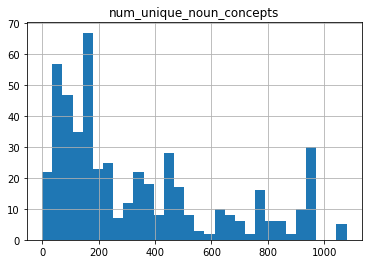

In [44]:
langs_to_exclude = order_and_ratio_df.loc[order_and_ratio_df['num_unique_noun_concepts'].nlargest(50).index]['Name']
order_and_ratio_df.hist(column=['num_unique_noun_concepts'], bins=30)

In [28]:
pruned_df = order_and_ratio_df[~order_and_ratio_df['Name'].isin(langs_to_exclude)]
pruned_df

,wals code,name,value,description,latitude,longitude,genus,family,area,ID,...,Country_ID,Source,dataset_ID,variety,Macroarea_y,Family_y,num_unique_noun_words,num_unique_noun_concepts,num_unique_adj_words,num_unique_adj_concepts
0,abk,Abkhaz,2,Noun-Adjective,43.083333,41.000000,Northwest Caucasian,Northwest Caucasian,Word Order,abk,...,GE,Bybee-et-al-1994 Gecadze-1979 Hewitt-1979 Hewi...,diacl,Abkhaz,Eurasia,Abkhaz-Adyge,594,502,152,100
1,abv,Abui,2,Noun-Adjective,-8.250000,124.666667,Alor-Pantar,Greater West Bomberai,Word Order,abv,...,ID,Kratochvil-2007,lexirumah,"Abui, Takalelang",Papunesia,Timor-Alor-Pantar,1350,327,288,73
2,abu,Abun,2,Noun-Adjective,-0.500000,132.500000,Abun,Abun,Word Order,abu,...,ID,Berry-1995a Berry-1995b Berry-and-Berry-1999,transnewguineaorg,Abun,Papunesia,Abun,95,26,6,2
3,ace,Acehnese,2,Noun-Adjective,5.500000,95.500000,Malayo-Sumbawan,Austronesian,Word Order,ace,...,ID,Aboe-Bakar-et-al-1985 Cowan-1981 Durie-1985 Du...,diacl,Acehnese,Eurasia,Austronesian,88,89,0,0
4,acg,Achagua,2,Noun-Adjective,4.416667,-72.250000,Japura-Colombia,Arawakan,Word Order,acg,...,CO,Aikhenvald-2007b Huber-and-Reed-1992 Melendez-...,hubercolumbian,Achagua,South America,Arawakan,187,157,56,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,yko,Yukaghir (Kolyma),1,Adjective-Noun,65.750000,150.833333,Yukaghir,Yukaghir,Word Order,yko,...,RU,Maslova-1999 Maslova-2003a Nikolaeva-and-Xelim...,northeuralex,Southern Yukaghir,Eurasia,Yukaghir,304,299,90,79
509,ytu,Yukaghir (Tundra),1,Adjective-Noun,69.000000,155.000000,Yukaghir,Yukaghir,Word Order,ytu,...,RU,Krejnovich-1958 Krejnovich-1968c Maslova-2003b,northeuralex,Northern Yukaghir,Eurasia,Yukaghir,372,394,88,85
510,yuw,Yuwaalaraay,1,Adjective-Noun,-29.500000,148.000000,Southeastern Pama-Nyungan,Pama-Nyungan,Word Order,yuw,...,AU,Mushin-1995 Williams-1980a,bowernpny,Gamilaraay,Australia,Pama-Nyungan,229,171,55,41
511,zun,Zuni,2,Noun-Adjective,35.083333,-108.833333,Zuni,Zuni,Word Order,zun,...,US,Bunzel-1933-1938 Bybee-et-al-1994 Cook-1975 Mi...,ids,Zuni,North America,Zuni,498,499,90,94


In [30]:
pruned_df.groupby('description')['num_unique_noun_words'].mean()

description
Adjective-Noun                             396.920000
No dominant order                          282.391304
Noun-Adjective                             293.085714
Only internally-headed relative clauses    677.000000
Name: num_unique_noun_words, dtype: float64

In [31]:
pruned_df.groupby('description')['num_unique_noun_concepts'].mean()

description
Adjective-Noun                             334.952000
No dominant order                          247.217391
Noun-Adjective                             241.025000
Only internally-headed relative clauses    590.000000
Name: num_unique_noun_concepts, dtype: float64

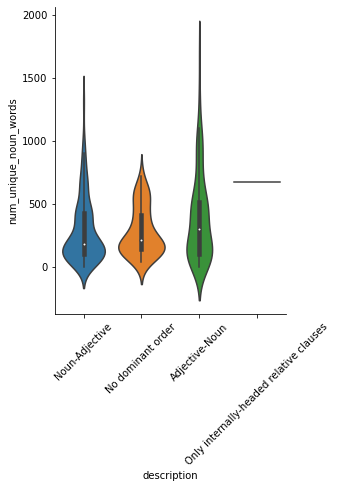

In [32]:
ax = sns.catplot(x='description', y='num_unique_noun_words', data=pruned_df, kind='violin')
plt.xticks(rotation=45)
plt.show()